In [1135]:
%matplotlib inline
import scipy as sc
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

Current level: 56
ha ca ha/ca
181.348354497 158 1.14777439555
163.655 158 1.03579113924
146.375551318 158 0.926427539988

In [1136]:
a0=1+3*5
b0=1+2*5

In [1137]:
a=245
b=223
prob = sc.stats.beta(a+a0,b+b0)

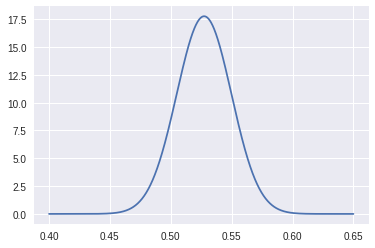

In [1138]:
x=sc.linspace(.4,.65,1000)
y=prob.pdf(x)
plt.plot(x,y)

In [1139]:
minp, maxp = prob.interval(.95)
(minp,maxp)

(0.48325021345739977, 0.57108647847128768)

In [1140]:
1-prob.cdf(minp)

0.97500000000000009

In [1141]:
midp=prob.mean()
midp

0.52727272727272723

In [1142]:
tu=58
sw=313
lo=156

In [1143]:
for p in (minp,midp,maxp):
    ha=sw*(1-p)+tu*p
    ca=lo
    print(f'Average value of harpooned fish: {ha.round(2)}, average value of caged fish: {ca}, ha/ca ratio: {(ha/ca).round(2)}')

Average value of harpooned fish: 189.77, average value of caged fish: 156, ha/ca ratio: 1.22
Average value of harpooned fish: 178.55, average value of caged fish: 156, ha/ca ratio: 1.14
Average value of harpooned fish: 167.37, average value of caged fish: 156, ha/ca ratio: 1.07


In [1144]:
ha=sw*(1-midp)+tu*midp
ca=lo

In [1145]:
tha=22.5+42
nha=78+130

In [1146]:
ha*nha/tha*60

34546.469344608886

In [1147]:
tca=25.16
nca=78

In [1148]:
ca*nca/tca*60

29017.488076311605

In [1149]:
prob2 = sc.stats.gamma(nha,scale=1/tha)

In [1150]:
x=sc.linspace(2,5,1000)
y=prob2.pdf(x)

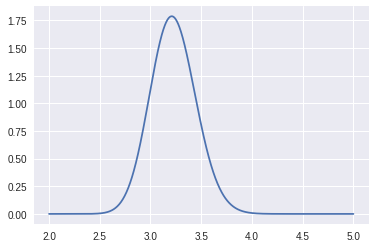

In [1151]:
plt.plot(x,y)

In [1152]:
prob2.mean()

3.2248062015503876

In [1153]:
nha/tha

3.2248062015503876

In [1154]:
min_profit,max_profit=[(sw*(1-p1)+tu*p1)*p2*60 for p1,p2 in zip(prob.interval(.95),prob2.interval(.95))]

In [1155]:
min_profit,prob2.mean()*ha*60,max_profit

(31897.754835074087, 34546.469344608879, 36931.33385183366)

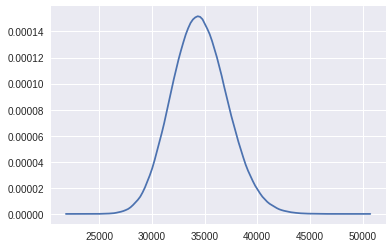

In [1156]:
#x=sc.linspace(20000,50000,1000)
n=10**6
y=sc.array([(sw*(1-p1)+tu*p1)*p2*60 for p1,p2 in zip(prob.rvs(size=n),prob2.rvs(size=n))])
sns.kdeplot(y)

In [1157]:
min_profit,max_profit=[ca*p2*60 for p2 in prob3.interval(.95)]

In [1158]:
min_profit,prob3.mean()*ca*60,max_profit

(22937.120174840631, 29017.488076311609, 35801.92131801074)

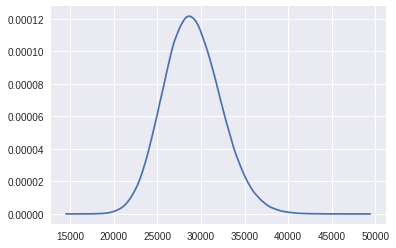

In [1159]:
y2=sc.array([ca*p2*60 for p2 in prob3.rvs(size=n)])
sns.kdeplot(y2)

(<matplotlib.axes._subplots.AxesSubplot at 0x7feaf4f807f0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7feaf4f807f0>)

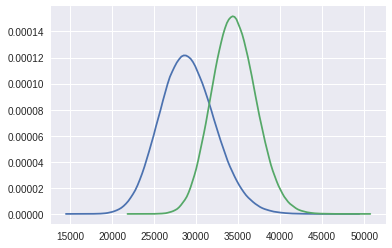

In [1160]:
sns.kdeplot(y2),sns.kdeplot(y)

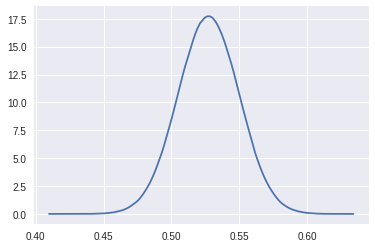

In [1176]:
sns.kdeplot(prob.rvs(10**6))

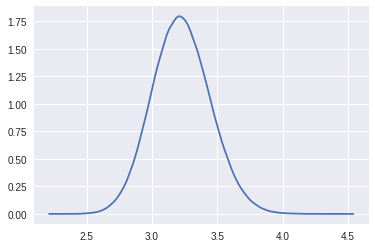

In [1162]:
sns.kdeplot(prob2.rvs(10**6))